# Import Data

In [3]:
import pandas as pd

In [1]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [4]:
data = pd.read_csv("day.csv")
print(data.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


Membaca data yaitu terdapat 16 kolom pada data dengan penjelasan masing-masing kolom terdapat pada Kaggle dengan link sebagai berikut. Saya menggunakan data day.csv dan tidak menggunakan hour.csv karena data nya sama dan berbeda di hari atau jam saja, sehingga untuk hari datanya akan lebih mudah diinterpretasikan. Mohon untuk pengertiannya.
https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset?resource=download&select=day.csv  

# Data Wrangling

In [5]:
# Mengecek missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Dari 16 kolom atau 16 variabel tersebut tidak terdapat Missing Values sehingga dapat dilanjutkan untuk melakukan statistika deskriptif

In [6]:
# Statistik deskriptif dasar
print("\nStatistik deskriptif:")
print(data.describe())


Statistik deskriptif:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std 

Hasil statistika deskriptif dasar menggunakan describe tanpa memperhatikan variabel tersebut numerik atau kategorik

# Descriptive Statistics and Data Visualization

In [7]:
# Menghitung mean, range, IQR, varians, dan standar deviasi
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Menghitung mean
mean_values = data[numerical_columns].mean()

# Menghitung range
range_values = data[numerical_columns].max() - data[numerical_columns].min()

# Menghitung IQR
iqr_values = data[numerical_columns].quantile(0.75) - data[numerical_columns].quantile(0.25)

# Menghitung varians
variance_values = data[numerical_columns].var()

# Menghitung standar deviasi
std_dev_values = data[numerical_columns].std()

# Menampilkan hasil
print("\nMeasuring Dispersion:")
print(f"Mean:\n{mean_values}")
print(f"Range:\n{range_values}")
print(f"IQR:\n{iqr_values}")
print(f"Variance:\n{variance_values}")
print(f"Standard Deviation:\n{std_dev_values}")


Measuring Dispersion:
Mean:
temp             0.495385
atemp            0.474354
hum              0.627894
windspeed        0.190486
casual         848.176471
registered    3656.172367
cnt           4504.348837
dtype: float64
Range:
temp             0.802537
atemp            0.761826
hum              0.972500
windspeed        0.485071
casual        3408.000000
registered    6926.000000
cnt           8692.000000
dtype: float64
IQR:
temp             0.318333
atemp            0.270760
hum              0.210209
windspeed        0.098265
casual         780.500000
registered    2279.500000
cnt           2804.000000
dtype: float64
Variance:
temp          3.350767e-02
atemp         2.655635e-02
hum           2.028605e-02
windspeed     6.005920e-03
casual        4.714504e+05
registered    2.434400e+06
cnt           3.752788e+06
dtype: float64
Standard Deviation:
temp             0.183051
atemp            0.162961
hum              0.142429
windspeed        0.077498
casual         686.622488
regi

Dari analisis data variabel numerik didapatkan hasil sebagai berikut.

* Terlihat bahwa suhu aktual (temp) dan suhu terasa (atemp) memiliki rata-rata mendekati 0.5 pada skala normalisasi, menunjukkan bahwa sebagian besar hari memiliki suhu yang sedang. Variasi suhu ini cukup signifikan dengan rentang sekitar 0.8 dan IQR sekitar 0.3, yang mengindikasikan adanya perbedaan suhu antara hari-hari terpanas dan terdingin. Standar deviasi suhu yang kecil (0.18 untuk temp dan 0.16 untuk atemp) menunjukkan bahwa meskipun terdapat variasi suhu, sebagian besar nilai tetap berada di sekitar rata-rata.
* Kelembaban (hum) memiliki rata-rata 0.63, menunjukkan tingkat kelembaban yang relatif tinggi. Dengan rentang mendekati 1 dan IQR sekitar 0.21, kelembaban menunjukkan variasi yang lebih besar dibandingkan suhu, tetapi tetap cukup terkonsentrasi di sekitar median. Kecepatan angin (windspeed) memiliki rata-rata 0.19 dengan rentang 0.49, menunjukkan bahwa sebagian besar hari memiliki angin dengan kecepatan rendah hingga sedang. Standar deviasi kecepatan angin (0.08) yang rendah menegaskan stabilitas pola angin.
* Untuk jumlah penyewaan sepeda, rata-rata total penyewaan (cnt) adalah 4504, dengan pengguna terdaftar (registered) memberikan kontribusi terbesar (3656) dibandingkan pengguna kasual (casual, 848). Variasi dalam jumlah penyewaan sangat besar, dengan rentang 8692 dan IQR 2804, menunjukkan adanya perbedaan yang signifikan antara hari-hari dengan tingkat penyewaan tertinggi dan terendah. Standar deviasi yang tinggi untuk cnt (1937) mengindikasikan bahwa pola penyewaan sangat bervariasi, yang kemungkinan dipengaruhi oleh faktor seperti musim, cuaca, atau hari kerja.





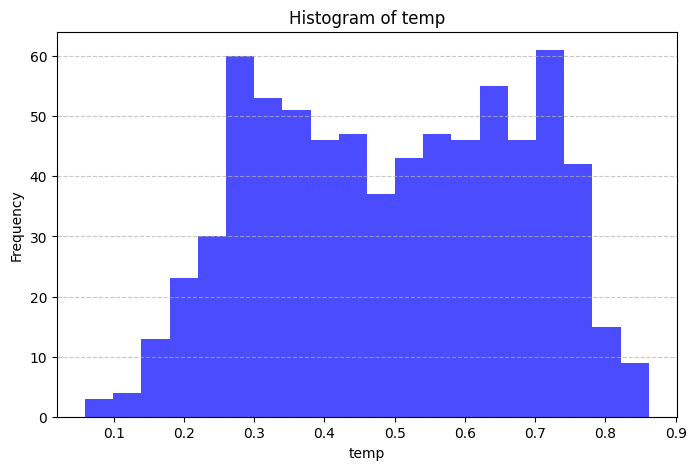

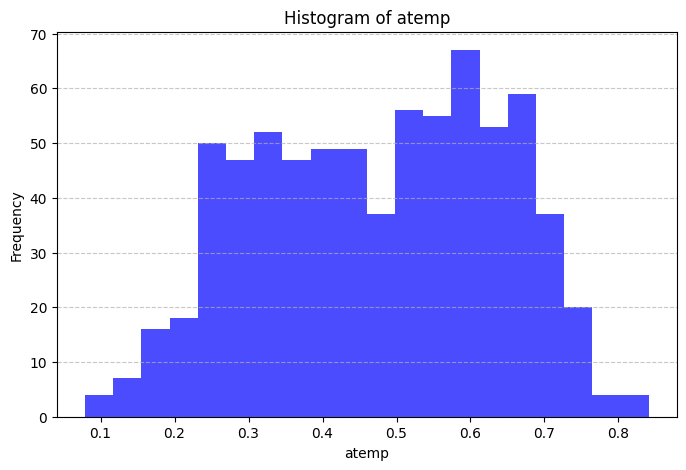

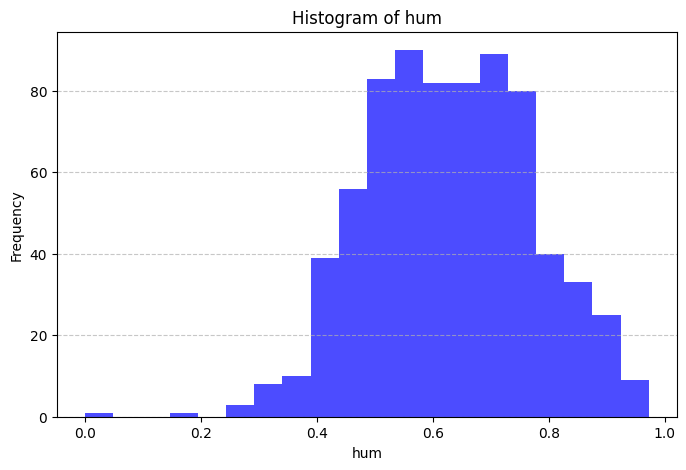

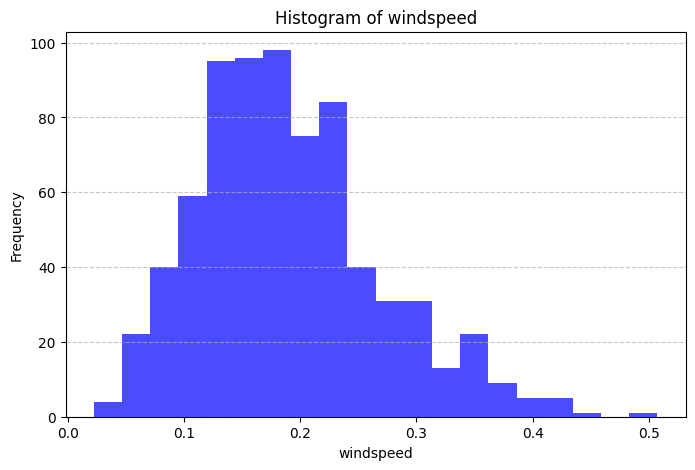

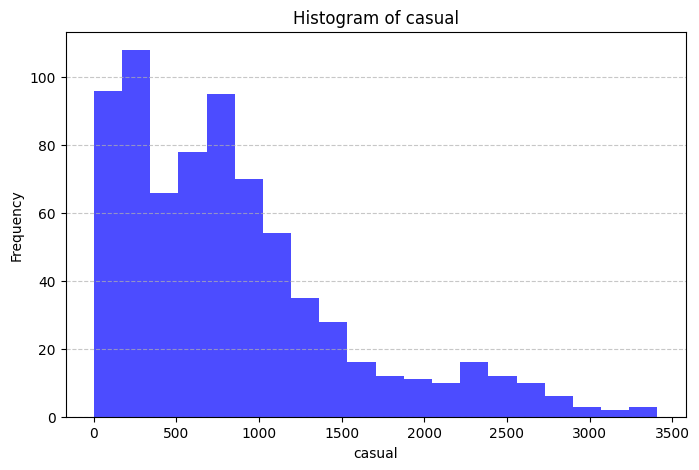

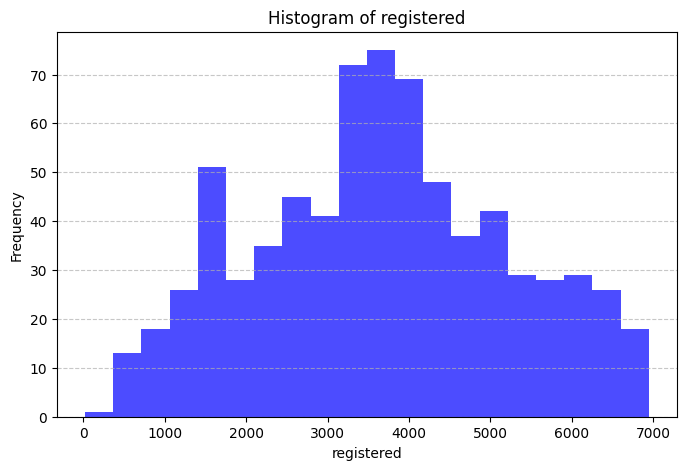

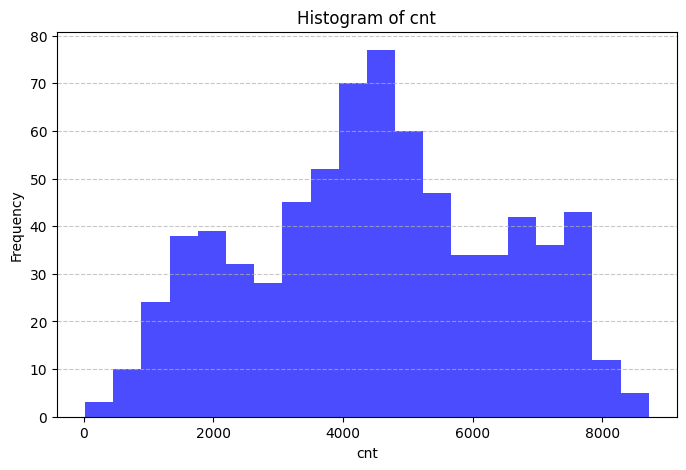

In [8]:
import matplotlib.pyplot as plt

# Membuat histogram untuk setiap kolom numerik
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=20, alpha=0.7, color='blue')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Berikut adalah hasil histogram pada variabel numerik pada data dengan bentuk yang berbeda-beda pada masing-masing variabel


Correlation Matrix:
                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991702  0.126963  -0.157944  0.543285    0.540012   
atemp       0.991702  1.000000  0.139988  -0.183643  0.543864    0.544192   
hum         0.126963  0.139988  1.000000  -0.248489 -0.077008   -0.091089   
windspeed  -0.157944 -0.183643 -0.248489   1.000000 -0.167613   -0.217449   
casual      0.543285  0.543864 -0.077008  -0.167613  1.000000    0.395282   
registered  0.540012  0.544192 -0.091089  -0.217449  0.395282    1.000000   
cnt         0.627494  0.631066 -0.100659  -0.234545  0.672804    0.945517   

                 cnt  
temp        0.627494  
atemp       0.631066  
hum        -0.100659  
windspeed  -0.234545  
casual      0.672804  
registered  0.945517  
cnt         1.000000  


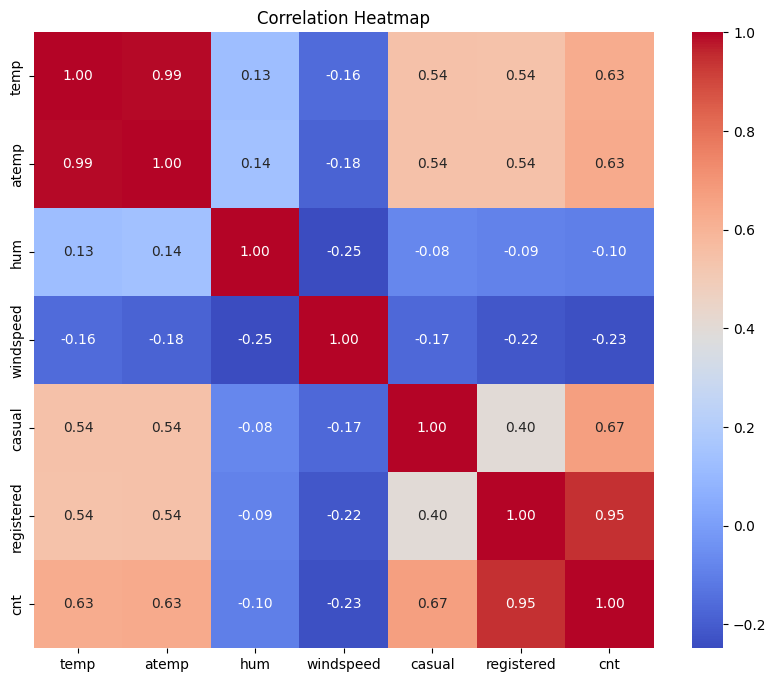

In [9]:
import seaborn as sns

# Menghitung korelasi
correlation_matrix = data[numerical_columns].corr()

# Menampilkan matriks korelasi
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Dari analisis korelasi (matriks korelasi) data variabel numerik didapatkan hasil sebagai berikut.

* Variabel suhu aktual (temp) dan suhu terasa (atemp) memiliki korelasi yang sangat kuat satu sama lain (0.99), menunjukkan bahwa kedua variabel ini hampir identik dalam mengukur suhu. Kedua variabel ini juga memiliki korelasi positif yang moderat terhadap jumlah total penyewaan sepeda (cnt), dengan nilai masing-masing 0.63 (atemp) dan 0.63 (temp). Hal ini menunjukkan bahwa penyewaan sepeda cenderung meningkat saat suhu lebih hangat, yang masuk akal mengingat aktivitas luar ruangan lebih nyaman di suhu yang sedang hingga hangat.
* Kelembaban (hum) memiliki korelasi negatif lemah dengan jumlah penyewaan sepeda (-0.10), yang menunjukkan bahwa kelembaban tidak memiliki pengaruh signifikan terhadap keputusan penyewaan. Di sisi lain, kecepatan angin (windspeed) memiliki korelasi negatif yang lebih kuat (-0.23) terhadap total penyewaan, menunjukkan bahwa angin kencang dapat menghambat aktivitas bersepeda.
* Ketika membandingkan penyewaan oleh pengguna kasual (casual) dan terdaftar (registered), ditemukan bahwa pengguna kasual memiliki korelasi yang lebih rendah terhadap suhu (0.54) dibandingkan pengguna terdaftar (0.54), tetapi korelasi terhadap total penyewaan (cnt) lebih tinggi untuk pengguna kasual (0.67) dibandingkan pengguna terdaftar (0.95). Hal ini menunjukkan bahwa tren penyewaan sepeda secara keseluruhan sangat dipengaruhi oleh pengguna terdaftar, yang memberikan kontribusi signifikan terhadap total penyewaan.





# Exploratory Data Analysis (EDA) and Data Visualization

Pertanyaan 1:
Bagaimana pengaruh hari kerja (workingday) terhadap total penyewaan sepeda (cnt), dan apakah terdapat perbedaan signifikan antara pengguna kasual dan terdaftar?

Tujuannya adalah memahami pola penggunaan sepeda antara hari kerja dan akhir pekan/libur, membantu dalam pengelolaan stok sepeda berdasarkan pola permintaan, dan menyediakan data yang mendukung untuk pengembangan strategi penyewaan di akhir pekan atau hari kerja.

<ipython-input-12-be99ce6c2dbb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='workingday', y='cnt', palette='Set2')


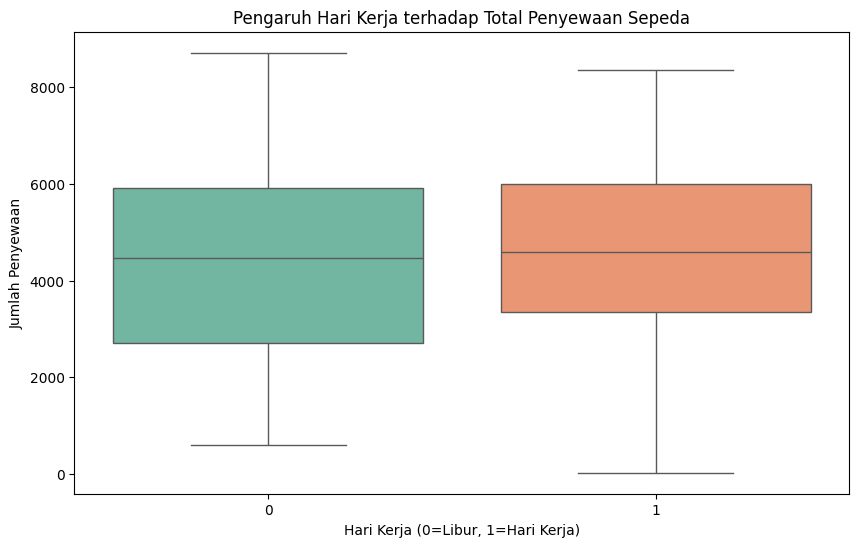

Rata-rata penyewaan berdasarkan hari kerja:
                 casual   registered          cnt
workingday                                       
0           1371.134199  2959.034632  4330.168831
1            606.570000  3978.250000  4584.820000


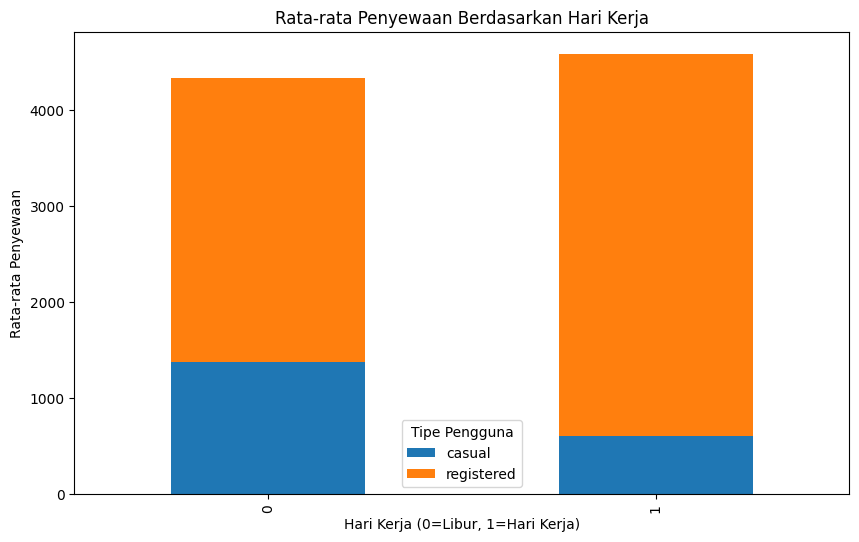

In [12]:
# Boxplot untuk workingday
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='workingday', y='cnt', palette='Set2')
plt.title('Pengaruh Hari Kerja terhadap Total Penyewaan Sepeda')
plt.xlabel('Hari Kerja (0=Libur, 1=Hari Kerja)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Perbandingan casual dan registered berdasarkan hari kerja
workingday_group = data.groupby('workingday')[['casual', 'registered', 'cnt']].mean()
print("Rata-rata penyewaan berdasarkan hari kerja:")
print(workingday_group)

# Visualisasi
workingday_group[['casual', 'registered']].plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Rata-rata Penyewaan Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja (0=Libur, 1=Hari Kerja)')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(title='Tipe Pengguna')
plt.show()

Dari pertanyaan pertama didapatkan hasil sebagai berikut.
* Boxplot menunjukkan bahwa jumlah penyewaan sepeda di hari libur dan di hari kerja. Pada hari libur, range atau jarak antara nilai maksimum dan nilai minimum lebih jauh dibandingkan hari kerja, artinya adalah pada hari libur ada kemungkinan untuk penyewaan sepeda ini lebih banyak dan ada kemungkinan bahwa penyewaan sepeda ini lebih kecil. Jadi pada hari kerja penyewaan sepeda lebih konsisten berada di antara 3000 hingga 6000 penyewa, sedangkan pada hari kerja berada di antara 2500 hingga 6000. Serta nilai median penyewaan sepeda pada hari kerja lebih besar dibandingkan penyewaan sepeda pada hari libur.
* Pada stacked bar chart didapatkan hasil bahwa rata-rata penyewaan pada hari kerja lebih banyak dibandingkan rata-rata penyewaan pada hari libur. Pada hari libur didominasi oleh penyewa casual dan pada hari kerja didominasi oleh pekerja registered. Sehingga dapat diartikan bahwa, penyewaan sepeda di hari kerja maupun hari libur sama-sama banyaknya sehingga perlu untuk menambah jumlah sepeda guna memenuhi kebutuhan pelanggan.



Pertanyaan 2:
Bagaimana pola penyewaan sepeda (cnt) pada hari kerja dan akhir pekan, berdasarkan musim (season)?

Tujuannya adalah untuk mengetahui bagaimana pola penyewaan sepeda dengan musim yang berbeda-beda

Rata-rata penyewaan berdasarkan hari kerja dan musim:
                        casual   registered          cnt
workingday season                                       
0          1        531.147541  1725.950820  2257.098361
           2       1887.375000  3255.053571  5142.428571
           3       1883.245614  3591.421053  5474.666667
           4       1250.771930  3355.438596  4606.210526
1          1        235.183333  2545.358333  2780.541667
           2        764.289062  4162.375000  4926.664062
           3        906.458015  4811.656489  5718.114504
           4        483.371901  4302.239669  4785.611570


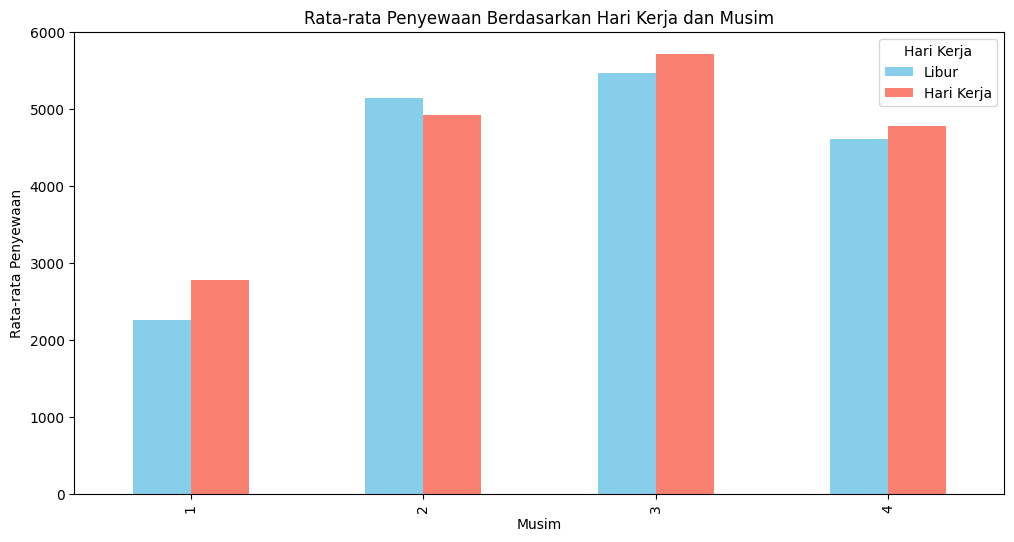

In [14]:
# Grouping berdasarkan workingday dan season
season_workingday_group = data.groupby(['workingday', 'season'])[['casual', 'registered', 'cnt']].mean()
print("Rata-rata penyewaan berdasarkan hari kerja dan musim:")
print(season_workingday_group)

# Visualisasi hasil
season_workingday_group.unstack(level=0)['cnt'].plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Rata-rata Penyewaan Berdasarkan Hari Kerja dan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(title='Hari Kerja', labels=['Libur', 'Hari Kerja'])
plt.show()

Dari pertanyaan kedua didapatkan hasil sebagai berikut.
* Pada hari kerja, jumlah penyewaan sepeda oleh pengguna terdaftar (registered) jauh lebih tinggi dibandingkan dengan pengguna kasual (casual). Ini terlihat jelas di semua musim, dengan rata-rata penyewaan terdaftar selalu lebih besar dari penyewaan kasual. Sebaliknya, pada hari libur, jumlah penyewaan sepeda oleh pengguna kasual lebih tinggi daripada pengguna terdaftar. Ini mengindikasikan bahwa pada hari libur, lebih banyak orang yang mencoba bersepeda secara spontan atau kasual, sementara pada hari kerja, pengguna terdaftar (yang kemungkinan besar lebih rutin) lebih banyak berpartisipasi dalam penyewaan sepeda.
* Pada musim semi, penyewaan sepeda pada hari kerja (workingday = 1) relatif rendah untuk pengguna kasual (235) tetapi sangat tinggi untuk pengguna terdaftar (2545). Sementara itu, pada hari libur (workingday = 0), meskipun jumlah penyewaan kasual lebih tinggi (531), penyewaan terdaftar tetap jauh lebih tinggi (1725). Ini menunjukkan bahwa musim semi adalah musim dengan peningkatan penggunaan sepeda baik oleh pengguna kasual maupun terdaftar.
* Pada musim panas, terdapat peningkatan besar dalam penyewaan sepeda. Pada hari libur, rata-rata penyewaan kasual sangat tinggi (1887), dan penyewaan terdaftar juga meningkat pesat (3255). Ini mengindikasikan bahwa musim panas adalah waktu puncak bagi penyewaan sepeda, terutama untuk pengguna kasual yang menikmati cuaca hangat.
* Musim gugur juga menunjukkan pola yang mirip dengan musim panas, di mana jumlah penyewaan sepeda pada hari libur lebih tinggi (1883 untuk kasual, 3591 untuk terdaftar), tetapi tidak setinggi musim panas. Pada hari kerja, meskipun penyewaan terdaftar tetap dominan, jumlah penyewaan kasual tetap cukup tinggi.
* Pada musim dingin, penyewaan sepeda menunjukkan penurunan signifikan, baik pada hari kerja maupun hari libur. Penyewaan kasual (1250) dan terdaftar (3355) menurun dibandingkan dengan musim lainnya. Hal ini dapat dijelaskan oleh cuaca yang lebih dingin, yang mengurangi minat orang untuk bersepeda, terutama untuk pengguna kasual yang mungkin tidak memiliki kebutuhan rutin untuk bersepeda.

Sehingga dapat disimpulkan bahwa pengguna terdaftar lebih banyak menggunakan sepeda pada hari kerja, sementara pengguna kasual lebih banyak bersepeda pada hari libur dan Musim panas dan musim gugur adalah musim dengan jumlah penyewaan tertinggi, baik untuk pengguna kasual maupun terdaftar. Musim semi dan musim dingin menunjukkan fluktuasi yang lebih rendah, dengan musim dingin menjadi periode dengan penyewaan paling sedikit.




